In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb  
from scipy.io import loadmat  
%matplotlib inline

# Principal Component Analysis
PCA is a linear transformation that finds the "principal components", or directions of greatest variance, in a data set.
In this exercise we're first tasked with implementing PCA and applying it to a simple 2-dimensional data set to see how it works. Let's start off by loading and visualizing the data set.

,X1,X2
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506


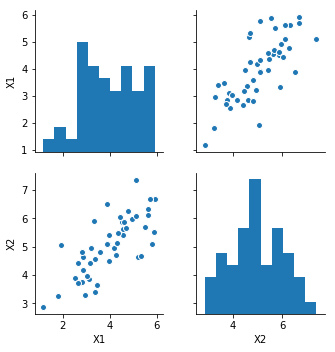

In [16]:
data = loadmat('../data/machine-learning-ex7/ex7/ex7data1.mat')  
data_df = pd.DataFrame(data['X'], columns=['X1', 'X2'])

sb.pairplot(data_df)
data_df.head()

The algorithm for PCA is fairly simple. After ensuring that the data is normalized, the output is simply the singular value decomposition of the covariance matrix of the original data. Since numpy already has built-in functions to calculate the covariance and SVD of a matrix, we'll use those rather than build from scratch.

In [9]:
def pca(X):  
    # normalize the features
    X = (X - X.mean()) / X.std()

    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]

    # perform SVD
    U, S, V = np.linalg.svd(cov)

    return U, S, V

U, S, V = pca(X)  
U, S, V  

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

Now that we have the principal components (matrix U), we can use these to project the original data into a lower-dimensional space. For this task we'll implement a function that computes the projection and selects only the top K components, effectively reducing the number of dimensions.

In [13]:
def project_data(X, U, k):  
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

Z = project_data(X, U, 1)  
Z[:3] 

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345]])

In [17]:
def recover_data(Z, U, k):  
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

X_recovered = recover_data(Z, U, 1)  
X_recovered[:3]  

matrix([[3.76152442, 2.89550838],
        [5.67283275, 4.36677606],
        [3.80014373, 2.92523637]])

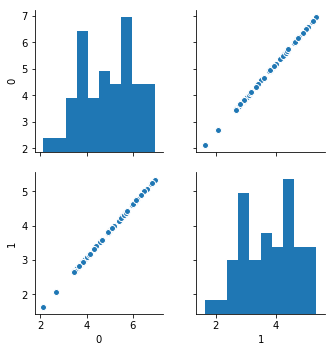

In [20]:
sb.pairplot(pd.DataFrame(X_recovered))


# PCA on images

Our last task in this exercise is to apply PCA to images of faces. By using the same dimension reduction techniques we can capture the "essence" of the images using much less data than the original images.



In [24]:
faces = loadmat('../data/machine-learning-ex7/ex7/ex7faces.mat')  

X = faces['X']  
X  

array([[ -37.86631387,  -45.86631387,  -53.86631387, ..., -110.86631387,
        -111.86631387,  -99.86631387],
       [   8.13368613,   -0.86631387,   -8.86631387, ...,  -34.86631387,
          -8.86631387,    0.13368613],
       [ -32.86631387,  -34.86631387,  -36.86631387, ..., -110.86631387,
        -111.86631387, -111.86631387],
       ...,
       [ -46.86631387,  -24.86631387,   -8.86631387, ...,   90.13368613,
          80.13368613,   59.13368613],
       [  19.13368613,   16.13368613,   14.13368613, ...,  -38.86631387,
         -41.86631387,  -46.86631387],
       [-108.86631387, -106.86631387, -102.86631387, ...,   17.13368613,
          17.13368613,   18.13368613]])

In [25]:
X.shape

(5000, 1024)

We can render a face here:

In [47]:
face = np.reshape(X[15,:], (32, 32))  
face.shape

(32, 32)

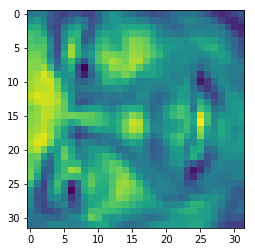

In [48]:
plt.imshow(face)  

In [ ]:
Run PCA on the face dataset:

In [71]:
U, S, V = pca(X)  
Z = project_data(X, U, 50)  

Now we can attempt to recover the original structure and render it again.



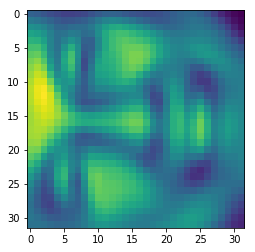

In [74]:
X_recovered = recover_data(Z, U, 50)  
face = np.reshape(X_recovered[15,:], (32, 32))  
plt.imshow(face)  